A greenhouse gas (GHG) is a gas that traps heat in the atmosphere. Greenhouse gases let sunlight pass through the atmosphere but prevent heat from leaving the atmosphere, also known as the greenhouse effect. Greenhouse gases are essential to keeping the Earth warm; without them, the Earth would be an average of about 0°F. The primary greenhouse gases in Earth’s atmosphere are water vapor, carbon dioxide, methane, nitrous oxide, and ozone.
  
Carbon dioxide (CO2) is a colourless, odourless and non-poisonous gas formed by combustion of carbon and in the respiration of living organisms and is considered a greenhouse gas. Emissions means the release of greenhouse gases and/or their precursors into the atmosphere over a specified area and period of time. Carbon dioxide emissions or CO2 emissions are emissions stemming from the burning of fossil fuels and the manufacture of cement; they include carbon dioxide produced during consumption of solid, liquid, and gas fuels as well as gas flaring.

# Total CO2 emissions by country

In [4]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
pd.options.mode.chained_assignment = None
%matplotlib inline

In [3]:
#!pip install pandas-profiling

In [5]:
df = pd.read_csv('owid-co2-data.csv')

In [7]:
#Where is the Output HTML file stored after pandas profiling?
##The Output HTML file will be usually stored in the same directory of your jupyter notebook
#profile = ProfileReport(df, minimal=True)
#profile.to_file("output.html")

In [8]:
#Creating a subset of regions 
regions = df[(df['country'] == 'Africa' ) | (df['country'] == 'Asia')|(df['country'] == 'Asia (excl. China & India)')|
(df['country'] == 'EU-27')|(df['country'] == 'EU-28')|(df['country'] == 'Europe')| (df['country'] == 'Europe (excl. EU-27)')| 
(df['country'] == 'Europe (excl. EU-28)')| (df['country'] == 'International transport')|(df['country']== 'North America')|
(df['country'] == 'South America')|(df['country'] == 'World')|(df['country'] == 'North America (excl. USA)') ]

In [9]:
#Dropping regions from the main dataframe
df.drop(regions.index, inplace = True)

In [10]:
#Shape of the dataset
df.shape

(22487, 60)

In [11]:
#Filtering the date 
df = df.loc[(2000<df['year']) & (df['year']<2021) ]


In [12]:
#dropping unwanted columns
df.drop(df.columns[[0,6,7,12,13,14,16,17,18,19,21,22,24,25,26,27,29,31,32,33,34,36]],axis =1,inplace = True)

In [13]:
df=df.drop(['co2_per_capita','trade_co2',"flaring_co2_per_capita","coal_co2_per_capita",'oil_co2_per_capita','co2_per_gdp','consumption_co2_per_capita','ghg_per_capita','ghg_excluding_lucf_per_capita','methane_per_capita','nitrous_oxide_per_capita','energy_per_capita', 'energy_per_gdp'], axis = 1)

In [14]:
#shape of the dataset after cleaning.
df.shape

(4593, 25)

In [15]:
#dropping the missing features which has null values over 80%
pct_null = df.isnull().sum() / len(df)
missing_features = pct_null[pct_null > 0.80].index
df.drop(missing_features, axis=1, inplace=True)
df

,country,year,co2,coal_co2,flaring_co2,cumulative_flaring_co2,cumulative_oil_co2,share_global_coal_co2,share_global_gas_co2,share_global_oil_co2,...,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,total_ghg_excluding_lucf,methane,nitrous_oxide,population,gdp,primary_energy_consumption
52,Afghanistan,2001,0.798,0.070,0.022,5.956,38.519,0.00,0.00,0.00,...,0.01,0.01,NaN,13.61,13.49,9.36,3.22,21606992.0,1.102127e+10,4.481
53,Afghanistan,2002,1.052,0.055,NaN,NaN,38.958,0.00,0.01,0.00,...,0.01,0.01,NaN,16.21,16.09,11.19,3.70,22600774.0,1.880487e+10,4.262
54,Afghanistan,2003,1.186,0.092,NaN,NaN,39.577,0.00,0.01,0.01,...,0.01,0.01,NaN,16.90,16.78,11.48,3.84,23680871.0,2.107434e+10,5.041
55,Afghanistan,2004,0.889,0.092,NaN,NaN,40.138,0.00,0.00,0.01,...,0.01,0.01,NaN,16.64,16.52,11.46,3.81,24726689.0,2.233257e+10,4.669
56,Afghanistan,2005,1.303,0.106,NaN,NaN,40.999,0.00,0.01,0.01,...,0.01,0.01,NaN,17.52,17.40,11.67,3.97,25654274.0,2.539769e+10,6.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,Zimbabwe,2016,10.738,6.959,NaN,NaN,133.175,0.05,NaN,0.03,...,NaN,0.02,NaN,116.52,29.12,11.50,6.21,14030338.0,2.096179e+10,47.500
25187,Zimbabwe,2017,9.582,5.665,NaN,NaN,136.414,0.04,NaN,0.03,...,NaN,0.02,NaN,116.09,28.80,11.62,6.35,14236599.0,2.194784e+10,NaN
25188,Zimbabwe,2018,11.854,7.101,NaN,NaN,140.470,0.05,NaN,0.03,...,NaN,0.02,NaN,118.77,31.38,11.96,6.59,14438812.0,2.271535e+10,NaN
25189,Zimbabwe,2019,10.949,6.020,NaN,NaN,144.702,0.04,NaN,0.03,...,NaN,0.02,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN


In [16]:
#dropping colummns having null values based on a minimum threshold defined by the following formula
perc = 80.0 
min_count =  int(((100-perc)/100)*df.shape[1] + 1)
df = df.dropna( axis=0, thresh=min_count)
df

,country,year,co2,coal_co2,flaring_co2,cumulative_flaring_co2,cumulative_oil_co2,share_global_coal_co2,share_global_gas_co2,share_global_oil_co2,...,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,total_ghg_excluding_lucf,methane,nitrous_oxide,population,gdp,primary_energy_consumption
52,Afghanistan,2001,0.798,0.070,0.022,5.956,38.519,0.00,0.00,0.00,...,0.01,0.01,NaN,13.61,13.49,9.36,3.22,21606992.0,1.102127e+10,4.481
53,Afghanistan,2002,1.052,0.055,NaN,NaN,38.958,0.00,0.01,0.00,...,0.01,0.01,NaN,16.21,16.09,11.19,3.70,22600774.0,1.880487e+10,4.262
54,Afghanistan,2003,1.186,0.092,NaN,NaN,39.577,0.00,0.01,0.01,...,0.01,0.01,NaN,16.90,16.78,11.48,3.84,23680871.0,2.107434e+10,5.041
55,Afghanistan,2004,0.889,0.092,NaN,NaN,40.138,0.00,0.00,0.01,...,0.01,0.01,NaN,16.64,16.52,11.46,3.81,24726689.0,2.233257e+10,4.669
56,Afghanistan,2005,1.303,0.106,NaN,NaN,40.999,0.00,0.01,0.01,...,0.01,0.01,NaN,17.52,17.40,11.67,3.97,25654274.0,2.539769e+10,6.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,Zimbabwe,2016,10.738,6.959,NaN,NaN,133.175,0.05,NaN,0.03,...,NaN,0.02,NaN,116.52,29.12,11.50,6.21,14030338.0,2.096179e+10,47.500
25187,Zimbabwe,2017,9.582,5.665,NaN,NaN,136.414,0.04,NaN,0.03,...,NaN,0.02,NaN,116.09,28.80,11.62,6.35,14236599.0,2.194784e+10,NaN
25188,Zimbabwe,2018,11.854,7.101,NaN,NaN,140.470,0.05,NaN,0.03,...,NaN,0.02,NaN,118.77,31.38,11.96,6.59,14438812.0,2.271535e+10,NaN
25189,Zimbabwe,2019,10.949,6.020,NaN,NaN,144.702,0.04,NaN,0.03,...,NaN,0.02,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN


In [17]:
#displaying basic statistics of our dataset
df.describe().applymap('{:,.2f}'.format)

,year,co2,coal_co2,flaring_co2,cumulative_flaring_co2,cumulative_oil_co2,share_global_coal_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,...,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,total_ghg_excluding_lucf,methane,nitrous_oxide,population,gdp,primary_energy_consumption
count,"4,400.00","4,399.00","2,469.00","1,437.00","1,437.00","4,399.00","2,469.00","2,384.00","4,399.00",920.00,...,"2,384.00","4,399.00",920.00,"3,474.00","3,474.00","3,474.00","3,474.00","4,380.00","2,970.00","3,476.00"
mean,"2,010.50",145.33,108.18,5.17,190.42,"2,071.25",0.82,0.85,0.42,2.21,...,0.85,0.43,2.20,216.97,210.32,40.15,14.69,"32,125,163.25","534,187,359,363.64",753.82
std,5.77,704.93,585.89,10.11,342.11,"9,928.70",4.29,2.43,1.66,7.40,...,3.49,2.06,7.48,834.31,875.66,119.54,44.67,"128,973,724.30","1,713,501,186,084.48","3,010.56"
min,"2,001.00",0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,-178.71,0.01,0.00,0.00,"1,606.00","323,367,307.20",0.02
25%,"2,005.75",1.00,0.44,0.15,5.42,24.05,0.00,0.03,0.01,0.16,...,0.02,0.01,0.17,8.29,7.46,2.08,0.53,"658,142.00","22,282,439,708.36",8.89
50%,"2,010.50",7.41,3.96,1.12,53.74,151.83,0.03,0.16,0.04,0.44,...,0.11,0.03,0.38,36.65,30.45,8.39,3.45,"5,845,298.00","73,768,462,014.83",60.14
75%,"2,015.25",54.77,30.57,4.61,197.95,"1,109.51",0.24,0.85,0.21,1.57,...,0.53,0.23,1.24,119.40,93.35,31.05,11.43,"21,133,931.00","345,164,667,359.25",373.03
max,"2,020.00","10,667.89","7,493.45",84.51,"2,253.81","158,138.19",53.10,25.28,23.92,58.47,...,39.93,30.27,50.55,"11,705.81","12,355.24","1,242.43",547.29,"1,439,323,774.00","18,151,620,437,216.00","39,360.93"


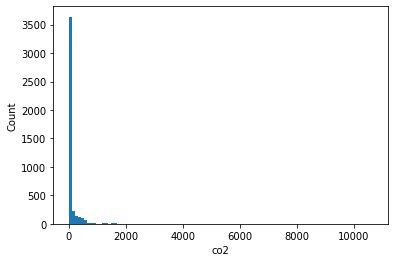

In [18]:
#Distribution of values for the Co2 column. Most of the values are zero or close to zero.
plt.hist(df.co2, bins=100, width=100)

plt.xlabel('co2')

plt.ylabel('Count')


plt.show()

In [19]:

#filtering dataset where the co2 value is more than 1000.
df = df.loc[(df["co2"] >= 1000)]

df

,country,year,co2,coal_co2,flaring_co2,cumulative_flaring_co2,cumulative_oil_co2,share_global_coal_co2,share_global_gas_co2,share_global_oil_co2,...,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,total_ghg_excluding_lucf,methane,nitrous_oxide,population,gdp,primary_energy_consumption
4704,China,2001,3514.934,2428.857,NaN,NaN,11241.877,26.80,1.40,6.36,...,0.77,2.99,50.05,4459.91,4791.44,824.52,388.84,1.299130e+09,6.329737e+12,12456.115
4705,China,2002,3872.595,2778.770,NaN,NaN,11894.963,29.39,1.10,6.30,...,0.78,3.08,49.66,4769.03,5100.86,820.09,406.42,1.307352e+09,6.814494e+12,13567.957
4706,China,2003,4545.014,3319.280,NaN,NaN,12622.062,32.38,1.19,6.82,...,0.80,3.18,49.31,5386.89,5717.66,816.62,408.40,1.315304e+09,7.248623e+12,15798.685
4707,China,2004,5223.755,3835.288,NaN,NaN,13461.155,35.20,1.36,7.62,...,0.82,3.30,48.99,6135.95,6467.06,830.23,420.91,1.323085e+09,7.830953e+12,18484.936
4708,China,2005,5876.555,4424.390,NaN,NaN,14311.327,38.24,1.58,7.66,...,0.85,3.41,48.74,6862.81,7194.48,837.94,428.39,1.330776e+09,8.602940e+12,21000.495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24050,United States,2016,5248.024,1379.744,51.908,1957.596,149222.148,9.61,21.56,18.78,...,32.49,27.38,15.74,5676.92,5907.27,609.89,249.26,3.230160e+08,1.716256e+13,25560.520
24051,United States,2017,5207.751,1338.667,56.186,2013.782,151487.474,9.26,20.80,18.67,...,32.12,27.19,15.50,5613.64,5842.80,615.77,250.68,3.250848e+08,1.759628e+13,25647.389
24052,United States,2018,5375.491,1283.532,71.008,2084.790,153804.284,8.72,22.01,19.01,...,31.79,27.02,15.25,5794.35,6023.62,623.77,251.35,3.270963e+08,1.814065e+13,26556.388
24053,United States,2019,5255.816,1098.854,84.510,2169.299,156117.656,7.54,22.44,18.92,...,31.49,26.85,14.99,NaN,NaN,NaN,NaN,3.290649e+08,NaN,26291.355


In [20]:
df.describe().applymap('{:,.2f}'.format)

,year,co2,coal_co2,flaring_co2,cumulative_flaring_co2,cumulative_oil_co2,share_global_coal_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,...,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,total_ghg_excluding_lucf,methane,nitrous_oxide,population,gdp,primary_energy_consumption
count,99.00,99.00,99.00,79.00,79.00,99.00,99.00,99.00,99.00,80.00,...,99.00,99.00,80.00,89.00,89.00,89.00,89.00,99.00,89.00,94.00
mean,"2,010.60","3,678.90","1,951.06",21.56,677.97,"45,101.33",14.71,8.80,8.53,17.45,...,11.00,9.37,18.84,"4,078.45","4,414.50",625.89,206.83,"633,533,817.87","8,166,885,879,507.13","14,833.30"
std,5.74,"2,932.45","2,226.81",22.77,697.21,"47,355.56",15.93,7.89,6.72,19.31,...,13.31,9.81,18.43,"3,161.14","3,270.05",346.29,166.83,"554,985,453.57","5,332,630,218,706.11","10,698.73"
min,"2,001.00","1,023.03",356.95,0.39,6.16,"5,418.68",2.55,0.90,2.80,2.67,...,0.45,1.40,2.87,"1,073.57","1,171.57",21.12,18.02,"126,476,458.00","1,650,354,385,308.50","3,896.83"
25%,"2,006.00","1,336.75",430.22,1.10,73.81,"15,673.54",3.25,2.21,3.42,4.90,...,0.95,3.59,5.14,"1,601.63","2,065.57",615.77,54.76,"143,575,699.00","4,024,058,556,640.22","6,106.17"
50%,"2,011.00","1,780.13","1,017.38",18.75,520.84,"27,553.23",7.38,3.95,5.37,7.02,...,2.55,5.74,10.34,"2,576.93","2,566.17",655.48,241.24,"309,011,469.00","5,314,516,588,695.22","8,005.97"
75%,"2,015.50","5,607.98","2,166.45",37.66,"1,226.48","32,139.13",18.50,13.84,11.17,19.78,...,15.29,6.45,27.15,"6,135.95","6,467.06",824.52,258.41,"1,303,241,001.50","13,708,809,342,467.60","25,764.89"
max,"2,020.00","10,667.89","7,493.45",84.51,"2,253.81","158,138.19",53.10,25.28,23.92,58.47,...,39.93,30.27,50.55,"11,705.81","12,355.24","1,242.43",547.29,"1,439,323,774.00","18,151,620,437,216.00","39,360.93"


In [21]:
#How many more null values in the dataset after dropping columns and filtering dataset?
df.isnull().sum()

country                                 0
year                                    0
co2                                     0
coal_co2                                0
flaring_co2                            20
cumulative_flaring_co2                 20
cumulative_oil_co2                      0
share_global_coal_co2                   0
share_global_gas_co2                    0
share_global_oil_co2                    0
share_global_other_co2                 19
share_global_cumulative_co2             0
share_global_cumulative_cement_co2      0
share_global_cumulative_coal_co2        0
share_global_cumulative_flaring_co2    20
share_global_cumulative_gas_co2         0
share_global_cumulative_oil_co2         0
share_global_cumulative_other_co2      19
total_ghg                              10
total_ghg_excluding_lucf               10
methane                                10
nitrous_oxide                          10
population                              0
gdp                               

In [22]:
#fill the rest of the columns with the mean value of each column
for col in df.columns[df.isnull().any()]:
        df[col].fillna(df[col].mean(), inplace = True)

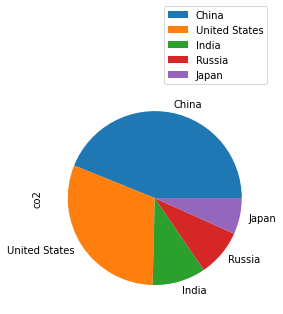

In [23]:
# Top countries having the highest mean of co2 emission
df.groupby("country")[["co2"]].mean().sort_values(ascending=False,by="co2").plot(kind="pie",subplots=True)
plt.legend(bbox_to_anchor=(1.04,1),loc="lower right")

In [24]:
#Listing out the countries and their numbers..
l=df.groupby("country")["co2"].apply(list)
l

country
China            [3514.934, 3872.595, 4545.014, 5223.755, 5876....
India            [1023.027, 1059.616, 1125.471, 1185.953, 1259....
Japan            [1249.766, 1279.12, 1287.468, 1282.862, 1290.3...
Russia           [1507.707, 1495.694, 1525.607, 1530.694, 1547....
United States    [5904.882, 5946.771, 6011.837, 6114.007, 6134....
Name: co2, dtype: object

In [25]:
cv_dict = l.to_dict()
print(cv_dict)

{'China': [3514.934, 3872.595, 4545.014, 5223.755, 5876.555, 6488.804, 6978.612, 7496.832, 7886.533, 8616.653, 9528.556, 9775.622, 9952.744, 9985.583, 9848.42, 9720.444, 9920.459, 10289.99, 10489.989, 10667.887], 'India': [1023.027, 1059.616, 1125.471, 1185.953, 1259.744, 1358.152, 1462.815, 1612.817, 1677.888, 1780.13, 1963.586, 2036.937, 2185.856, 2268.567, 2382.223, 2433.856, 2599.806, 2625.968, 2441.792], 'Japan': [1249.766, 1279.12, 1287.468, 1282.862, 1290.371, 1267.362, 1303.134, 1232.314, 1163.213, 1214.816, 1264.866, 1306.01, 1315.343, 1263.729, 1223.396, 1203.718, 1188.123, 1143.458, 1105.929, 1030.775], 'Russia': [1507.707, 1495.694, 1525.607, 1530.694, 1547.599, 1606.542, 1604.549, 1636.923, 1528.961, 1613.113, 1665.207, 1680.104, 1619.42, 1622.589, 1623.1, 1618.599, 1646.457, 1691.647, 1679.449, 1577.136], 'United States': [5904.882, 5946.771, 6011.837, 6114.007, 6134.521, 6051.668, 6131.004, 5914.078, 5478.21, 5675.786, 5540.173, 5338.698, 5474.257, 5522.807, 5371.771, 52

In [26]:
max_key, max_value = max(cv_dict.items(), key = lambda x: len(set(x[1])))

cv_dict_full = {}
for k,v in cv_dict.items():
    if len(v) < len(max_value):
        trailing_zeros = [0]*(len(max_value)-len(v))
        cv_dict_full[k] = trailing_zeros+v
    else:
        cv_dict_full[k] = v
        
print(cv_dict_full)

{'China': [3514.934, 3872.595, 4545.014, 5223.755, 5876.555, 6488.804, 6978.612, 7496.832, 7886.533, 8616.653, 9528.556, 9775.622, 9952.744, 9985.583, 9848.42, 9720.444, 9920.459, 10289.99, 10489.989, 10667.887], 'India': [0, 1023.027, 1059.616, 1125.471, 1185.953, 1259.744, 1358.152, 1462.815, 1612.817, 1677.888, 1780.13, 1963.586, 2036.937, 2185.856, 2268.567, 2382.223, 2433.856, 2599.806, 2625.968, 2441.792], 'Japan': [1249.766, 1279.12, 1287.468, 1282.862, 1290.371, 1267.362, 1303.134, 1232.314, 1163.213, 1214.816, 1264.866, 1306.01, 1315.343, 1263.729, 1223.396, 1203.718, 1188.123, 1143.458, 1105.929, 1030.775], 'Russia': [1507.707, 1495.694, 1525.607, 1530.694, 1547.599, 1606.542, 1604.549, 1636.923, 1528.961, 1613.113, 1665.207, 1680.104, 1619.42, 1622.589, 1623.1, 1618.599, 1646.457, 1691.647, 1679.449, 1577.136], 'United States': [5904.882, 5946.771, 6011.837, 6114.007, 6134.521, 6051.668, 6131.004, 5914.078, 5478.21, 5675.786, 5540.173, 5338.698, 5474.257, 5522.807, 5371.771,

In [27]:
print(max_key, len(max_value))

China 20


In [28]:
df["year"]

4704     2001
4705     2002
4706     2003
4707     2004
4708     2005
         ... 
24050    2016
24051    2017
24052    2018
24053    2019
24054    2020
Name: year, Length: 99, dtype: int64

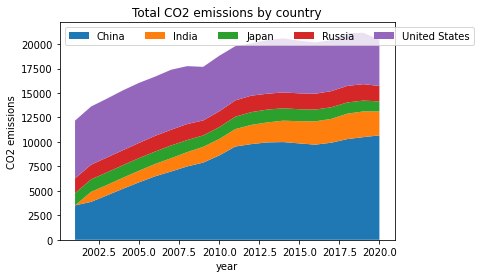

In [29]:
year = np.arange(2001, 2021)

fig, ax = plt.subplots()
ax.stackplot(year, cv_dict_full.values(), labels=cv_dict_full.keys())
ax.legend(loc='upper left', ncol=5)
ax.set_title('Total CO2 emissions by country')
ax.set_xlabel('year')
ax.set_ylabel('CO2 emissions')


plt.show()

### Result: This stream graph shows CO2 emissions by tons per country across time. The changing height and length of each country’s stream illustrate the changing amount of CO2 emissions in relation to total CO2 emissions each year.

## Highest Per Capita CO2 Emissions
### here we visualize the countries with the highest per capita carbon emissions from around the world.

In [32]:
df = pd.read_csv('owid-co2-data.csv')

In [33]:
# Creating a subset of regions 
regions = df[(df['country'] == 'Africa' ) | (df['country'] == 'Asia')|(df['country'] == 'Asia (excl. China & India)')|
(df['country'] == 'EU-27')|(df['country'] == 'EU-28')|(df['country'] == 'Europe')| (df['country'] == 'Europe (excl. EU-27)')| 
(df['country'] == 'Europe (excl. EU-28)')| (df['country'] == 'International transport')|(df['country']== 'North America')|
(df['country'] == 'South America')|(df['country'] == 'World')|(df['country'] == 'North America(excel.USA)') ]
#regions.info()

In [34]:
# Dropping regions from the main dataframe
df.drop(regions.index, inplace = True)

In [35]:
df.shape

(22723, 60)

In [36]:
# Filtering the date based on year
df = df.loc[(2000<df['year']) & (df['year']<2021) ]

In [37]:
df.shape

(4613, 60)

In [38]:
df.drop(regions.columns[[0,6,7,12,13,14,16,17,18,19,21,22,24,25,26,27,29,31,32,33,34,36,49]],axis =1,inplace = True)

In [39]:
df.shape

(4613, 37)

In [40]:
df=df.drop(['co2','trade_co2',"coal_co2",'cumulative_oil_co2','share_global_coal_co2','share_global_gas_co2','share_global_oil_co2', 'share_global_cumulative_co2','share_global_cumulative_cement_co2','methane','nitrous_oxide','population', 'gdp','share_global_cumulative_coal_co2','share_global_cumulative_gas_co2', 'primary_energy_consumption','share_global_cumulative_oil_co2','total_ghg'], axis = 1)

In [41]:
df.shape

(4613, 19)

In [42]:
df=df.groupby(["country"])[['co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2', 'flaring_co2_per_capita', 'oil_co2_per_capita',
       'co2_per_gdp', 'consumption_co2_per_capita', 'cumulative_flaring_co2',
       'share_global_other_co2', 'share_global_cumulative_flaring_co2',
       'share_global_cumulative_other_co2', 'ghg_per_capita',
       'ghg_excluding_lucf_per_capita', 'methane_per_capita',
       'nitrous_oxide_per_capita', 'energy_per_capita', 'energy_per_gdp']].mean()
df

,co2_per_capita,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,oil_co2_per_capita,co2_per_gdp,consumption_co2_per_capita,cumulative_flaring_co2,share_global_other_co2,share_global_cumulative_flaring_co2,share_global_cumulative_other_co2,ghg_per_capita,ghg_excluding_lucf_per_capita,methane_per_capita,nitrous_oxide_per_capita,energy_per_capita,energy_per_gdp
country,,,,,,,,,,,,,,,,,
Afghanistan,0.18665,0.071350,0.02200,0.0010,0.10365,0.108444,NaN,5.95600,NaN,0.050,NaN,1.600444,1.599333,1.211944,0.200722,686.662250,0.417000
Albania,1.49800,0.115200,NaN,NaN,1.18780,0.175833,1.919789,NaN,NaN,NaN,NaN,2.827944,3.125111,1.117833,0.401611,10653.332562,1.314375
Algeria,3.32010,0.047579,7.37490,0.2047,1.18310,0.289000,NaN,523.43305,NaN,3.745,NaN,4.730444,4.772167,1.329611,0.257111,12930.115316,1.094625
Andorra,6.48855,NaN,NaN,NaN,6.48855,NaN,NaN,NaN,NaN,NaN,NaN,7.775778,7.775778,0.584111,0.000000,NaN,NaN
Angola,1.01255,NaN,11.02325,0.4631,0.45635,0.260222,NaN,177.74515,NaN,1.209,NaN,5.429833,3.337389,1.720500,1.030111,3072.964562,0.981563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1.59855,0.661500,NaN,NaN,0.49360,0.312667,1.658263,NaN,NaN,NaN,NaN,2.790000,2.749056,0.934333,0.243333,6400.827053,1.318938
Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,0.77115,0.014231,NaN,NaN,0.70270,0.191167,NaN,NaN,NaN,NaN,NaN,1.311444,1.311444,0.334056,0.137556,3748.539438,1.052000


In [43]:
pct_null = df.isnull().sum() / len(df)
missing_features = pct_null[pct_null > 0.60].index
df.drop(missing_features, axis=1, inplace=True)
df

,co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,co2_per_gdp,consumption_co2_per_capita,ghg_per_capita,ghg_excluding_lucf_per_capita,methane_per_capita,nitrous_oxide_per_capita,energy_per_capita,energy_per_gdp
country,,,,,,,,,,,
Afghanistan,0.18665,0.071350,0.10365,0.108444,NaN,1.600444,1.599333,1.211944,0.200722,686.662250,0.417000
Albania,1.49800,0.115200,1.18780,0.175833,1.919789,2.827944,3.125111,1.117833,0.401611,10653.332562,1.314375
Algeria,3.32010,0.047579,1.18310,0.289000,NaN,4.730444,4.772167,1.329611,0.257111,12930.115316,1.094625
Andorra,6.48855,NaN,6.48855,NaN,NaN,7.775778,7.775778,0.584111,0.000000,NaN,NaN
Angola,1.01255,NaN,0.45635,0.260222,NaN,5.429833,3.337389,1.720500,1.030111,3072.964562,0.981563
...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1.59855,0.661500,0.49360,0.312667,1.658263,2.790000,2.749056,0.934333,0.243333,6400.827053,1.318938
Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,0.77115,0.014231,0.70270,0.191167,NaN,1.311444,1.311444,0.334056,0.137556,3748.539438,1.052000


In [44]:
perc = 80.0 
min_count =  int(((100-perc)/100)*df.shape[1] + 1)
df = df.dropna( axis=0, thresh=min_count)
df

,co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,co2_per_gdp,consumption_co2_per_capita,ghg_per_capita,ghg_excluding_lucf_per_capita,methane_per_capita,nitrous_oxide_per_capita,energy_per_capita,energy_per_gdp
country,,,,,,,,,,,
Afghanistan,0.18665,0.071350,0.10365,0.108444,NaN,1.600444,1.599333,1.211944,0.200722,686.662250,0.417000
Albania,1.49800,0.115200,1.18780,0.175833,1.919789,2.827944,3.125111,1.117833,0.401611,10653.332562,1.314375
Algeria,3.32010,0.047579,1.18310,0.289000,NaN,4.730444,4.772167,1.329611,0.257111,12930.115316,1.094625
Andorra,6.48855,NaN,6.48855,NaN,NaN,7.775778,7.775778,0.584111,0.000000,NaN,NaN
Angola,1.01255,NaN,0.45635,0.260222,NaN,5.429833,3.337389,1.720500,1.030111,3072.964562,0.981563
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,5.87550,0.015684,3.35945,0.403111,5.227474,12.177278,9.081222,2.674667,0.467611,31272.590895,2.789750
Vietnam,1.59855,0.661500,0.49360,0.312667,1.658263,2.790000,2.749056,0.934333,0.243333,6400.827053,1.318938
Yemen,0.77115,0.014231,0.70270,0.191167,NaN,1.311444,1.311444,0.334056,0.137556,3748.539438,1.052000


In [45]:
df.describe().applymap('{:,.2f}'.format)

,co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,co2_per_gdp,consumption_co2_per_capita,ghg_per_capita,ghg_excluding_lucf_per_capita,methane_per_capita,nitrous_oxide_per_capita,energy_per_capita,energy_per_gdp
count,213.00,136.00,213.00,167.00,121.00,193.00,193.00,193.00,193.00,203.00,163.00
mean,4.93,1.40,2.54,0.28,6.70,7.49,6.88,1.82,0.58,"25,984.92",1.53
std,6.00,2.10,2.98,0.20,6.72,7.51,7.10,3.00,0.85,"33,503.73",1.01
min,0.03,0.00,0.03,0.04,0.07,-3.92,0.44,0.00,0.00,105.14,0.07
25%,0.80,0.05,0.48,0.15,1.29,2.71,2.23,0.69,0.22,"3,873.45",0.89
50%,2.86,0.35,1.64,0.24,4.78,5.26,4.52,1.04,0.36,"14,778.37",1.29
75%,6.90,1.83,3.46,0.37,10.32,9.28,8.92,1.51,0.55,"35,150.50",1.91
max,45.97,8.96,18.32,1.19,36.35,47.54,45.17,28.12,8.68,"212,107.76",6.86


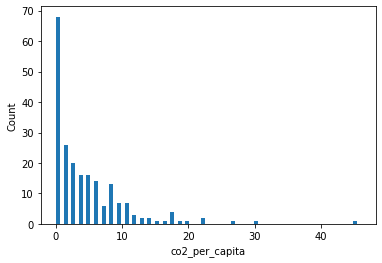

In [46]:
plt.hist(df.co2_per_capita, bins=40, width=0.6)

plt.xlabel('co2_per_capita')

plt.ylabel('Count')


plt.show()

In [47]:
df = df.loc[df["co2_per_capita"] >= 2.50]

In [48]:
df.describe().applymap('{:,.2f}'.format)

,co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,co2_per_gdp,consumption_co2_per_capita,ghg_per_capita,ghg_excluding_lucf_per_capita,methane_per_capita,nitrous_oxide_per_capita,energy_per_capita,energy_per_gdp
count,113.00,79.00,113.00,85.00,70.00,94.00,94.00,94.00,94.00,107.00,83.00
mean,8.50,2.28,4.21,0.38,10.67,11.27,11.18,2.30,0.59,"44,595.73",1.90
std,6.36,2.39,3.24,0.19,6.33,8.56,7.78,3.70,0.69,"37,052.06",0.96
min,2.54,0.00,0.46,0.10,3.56,1.39,3.24,0.00,0.00,"8,258.49",0.67
25%,4.44,0.29,2.32,0.25,6.21,5.72,6.32,0.81,0.26,"20,393.51",1.28
50%,6.49,1.46,3.36,0.32,9.21,8.40,8.31,1.16,0.40,"33,360.09",1.67
75%,10.15,3.44,4.82,0.45,13.00,13.52,12.71,1.85,0.59,"53,945.51",2.25
max,45.97,8.96,18.32,1.17,36.35,47.54,45.17,28.12,3.66,"212,107.76",6.86


In [49]:
df.isnull().sum()

co2_per_capita                    0
coal_co2_per_capita              34
oil_co2_per_capita                0
co2_per_gdp                      28
consumption_co2_per_capita       43
ghg_per_capita                   19
ghg_excluding_lucf_per_capita    19
methane_per_capita               19
nitrous_oxide_per_capita         19
energy_per_capita                 6
energy_per_gdp                   30
dtype: int64

In [50]:
for col in df.columns[df.isnull().any()]:
        df[col].fillna(df[col].mean(), inplace = True)

In [51]:
## Leaders in Per Capita CO2 Emissions

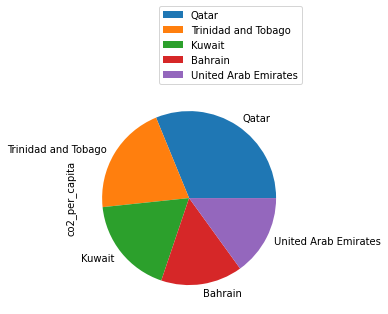

In [52]:
df.groupby("country")[["co2_per_capita"]].mean().sort_values(ascending=False,by="co2_per_capita").head().plot(kind="pie",subplots=True)
plt.legend(bbox_to_anchor=(1.04,1),loc="lower right")

### Result: Oil-producing countries in the Middle East are the highest emitters of CO2 on a per capita basis

Using the regions dataset..

Understanding continent-wise data

Let's plot some visualizations to see which continents generates most co2 emissions

In [53]:
regions.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
72,NaN,Africa,1884,0.022,0.005,NaN,NaN,NaN,0.022,0.005,...,NaN,NaN,NaN,NaN,NaN,130848603.0,NaN,NaN,NaN,NaN
73,NaN,Africa,1885,0.037,0.008,NaN,NaN,NaN,0.037,0.008,...,NaN,NaN,NaN,NaN,NaN,131563803.0,NaN,NaN,NaN,NaN
74,NaN,Africa,1886,0.048,0.010,NaN,NaN,NaN,0.048,0.010,...,NaN,NaN,NaN,NaN,NaN,132284841.0,NaN,NaN,NaN,NaN
75,NaN,Africa,1887,0.048,0.010,NaN,NaN,NaN,0.048,0.010,...,NaN,NaN,NaN,NaN,NaN,133011765.0,NaN,NaN,NaN,NaN
76,NaN,Africa,1888,0.081,0.017,NaN,NaN,NaN,0.081,0.017,...,NaN,NaN,NaN,NaN,NaN,133744628.0,NaN,NaN,NaN,NaN


In [54]:
#inspecting the regions dataset
regions.describe()

,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,2468.000000,2423.000000,2150.000000,362.000000,1181.000000,1181.000000,2349.000000,2147.000000,683.000000,683.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,1.139000e+03,1.600000e+01,220.000000,220.000000,52.000000
mean,1908.201378,1930.948360,3.364688,-23.946163,95.809899,0.088521,938.039809,1.882122,67.947016,0.079372,...,7.682310,3977.517069,1.140241,1485.240000,0.515034,9.943749e+08,3.865245e+13,37861.121650,36216.057814,2.118327
std,71.565597,4271.732878,3.802509,502.837647,216.473391,0.076980,1826.190682,1.902147,81.748182,0.059888,...,1.933699,3541.881360,0.131420,1242.324683,0.120318,1.359843e+09,4.320865e+13,40762.616365,34369.225746,0.367945
min,1750.000000,0.002000,0.000000,-1657.998000,0.000000,0.000000,0.002000,0.000000,0.220000,0.000000,...,5.470000,396.830000,0.893000,214.150000,0.402000,1.450666e+07,1.138510e+12,697.568000,2178.898000,1.429000
25%,1853.000000,34.683000,0.520000,-256.846750,5.099000,0.016000,25.105000,0.340000,22.908500,0.038500,...,5.835500,476.127500,1.089250,268.982500,0.415000,1.874227e+08,4.090255e+12,10647.629250,10788.181750,1.867750
50%,1915.000000,400.899000,1.936000,0.000000,32.909000,0.075000,265.933000,1.296000,40.886000,0.064000,...,7.178500,3777.190000,1.131000,1362.440000,0.468500,4.861242e+08,1.753014e+13,24081.522000,20615.686000,2.196000
75%,1969.000000,2057.868000,4.372750,323.974250,87.414000,0.145000,1221.510000,3.021000,70.504500,0.107000,...,9.863000,7328.002500,1.214750,2695.595000,0.620000,1.180328e+09,6.735182e+13,35350.602000,44783.143000,2.433500
max,2020.000000,36702.503000,16.007000,1028.487000,1626.371000,0.284000,15062.902000,12.453000,435.034000,0.320000,...,10.858000,8298.270000,1.472000,3078.270000,0.800000,7.794799e+09,1.136302e+14,162194.290000,101186.932000,2.612000


In [55]:
#size of the dataset
regions.shape

(2468, 60)

In [56]:
regions['country'].value_counts()

EU-28                         271
Europe                        271
Europe (excl. EU-27)          271
World                         271
North America                 236
EU-27                         229
Europe (excl. EU-28)          192
Asia                          191
Asia (excl. China & India)    191
Africa                        137
South America                 137
International transport        71
Name: country, dtype: int64

In [57]:
regions.isnull().sum()

iso_code                               2197
country                                   0
year                                      0
co2                                      45
co2_per_capita                          318
trade_co2                              2106
cement_co2                             1287
cement_co2_per_capita                  1287
coal_co2                                119
coal_co2_per_capita                     321
flaring_co2                            1785
flaring_co2_per_capita                 1785
gas_co2                                1240
gas_co2_per_capita                     1240
oil_co2                                 678
oil_co2_per_capita                      749
other_industry_co2                     2042
other_co2_per_capita                   2042
co2_growth_prct                          12
co2_growth_abs                           64
co2_per_gdp                             802
co2_per_unit_energy                    1863
consumption_co2                 

In [58]:
regions.drop(columns=['iso_code','total_ghg','ghg_per_capita','total_ghg_excluding_lucf','methane','methane_per_capita','nitrous_oxide','nitrous_oxide_per_capita',
                 'population','gdp','primary_energy_consumption','energy_per_capita','energy_per_gdp','ghg_excluding_lucf_per_capita'],inplace=True)

In [59]:
regions.isnull().sum()

country                                   0
year                                      0
co2                                      45
co2_per_capita                          318
trade_co2                              2106
cement_co2                             1287
cement_co2_per_capita                  1287
coal_co2                                119
coal_co2_per_capita                     321
flaring_co2                            1785
flaring_co2_per_capita                 1785
gas_co2                                1240
gas_co2_per_capita                     1240
oil_co2                                 678
oil_co2_per_capita                      749
other_industry_co2                     2042
other_co2_per_capita                   2042
co2_growth_prct                          12
co2_growth_abs                           64
co2_per_gdp                             802
co2_per_unit_energy                    1863
consumption_co2                        2106
consumption_co2_per_capita      

Mean is not advisable to use to fill na values because of the presence of outliers. So in that case we can go for interpolation, particularly, for variables that change with time like temperature for an example

In [60]:
#filling null values by interpolation both forward and backward direction
regions.interpolate(method = 'linear', limit_direction = 'forward',inplace=True)
regions.interpolate(method = 'linear', limit_direction = 'backward',inplace=True)
regions.isnull().sum()

country                                0
year                                   0
co2                                    0
co2_per_capita                         0
trade_co2                              0
cement_co2                             0
cement_co2_per_capita                  0
coal_co2                               0
coal_co2_per_capita                    0
flaring_co2                            0
flaring_co2_per_capita                 0
gas_co2                                0
gas_co2_per_capita                     0
oil_co2                                0
oil_co2_per_capita                     0
other_industry_co2                     0
other_co2_per_capita                   0
co2_growth_prct                        0
co2_growth_abs                         0
co2_per_gdp                            0
co2_per_unit_energy                    0
consumption_co2                        0
consumption_co2_per_capita             0
consumption_co2_per_gdp                0
cumulative_co2  

In [61]:
#filtering the last 5 years for visualisation purpose
regions = regions.loc[regions['year'] >= 2015]

Creating a new column for total co2 emission from production based activities, 

trade, from cement, burning up of coal, oil, gas, flaring and other industry based activites measured in million tonnes.

In [62]:
#creating a new column for total co2 emission
regions['Total_co2_emission'] = regions['co2']+regions['trade_co2']+regions['cement_co2']+regions['coal_co2']+regions['flaring_co2']\
                                +regions['gas_co2']+regions['oil_co2']+regions['other_industry_co2']+regions['consumption_co2']

Creating a new column for total co2 emission per capita from production based activities, 

trade, from cement, burning up of coal, oil, gas, flaring and other industry based activites measured in million tonnes per person

In [63]:

regions['Total_co2_emission_per_capita'] = regions['co2_per_capita']+regions['cement_co2_per_capita']+regions['coal_co2_per_capita']+regions['flaring_co2_per_capita']\
                                +regions['gas_co2_per_capita']+regions['oil_co2_per_capita']+regions['other_co2_per_capita']+regions['consumption_co2_per_capita']

 Creating a new column for total share global 

 measured as a percentage of global emissions of CO2 from production based activities, 

 trade, from cement, burning up of coal, oil, gas, flaring and other industry based activites

In [64]:
regions['Total_share_global'] = regions['share_global_co2']+regions['share_global_cement_co2']+regions['share_global_coal_co2']+regions['share_global_flaring_co2']\
                                +regions['share_global_gas_co2']+regions['share_global_oil_co2']+regions['share_global_other_co2']

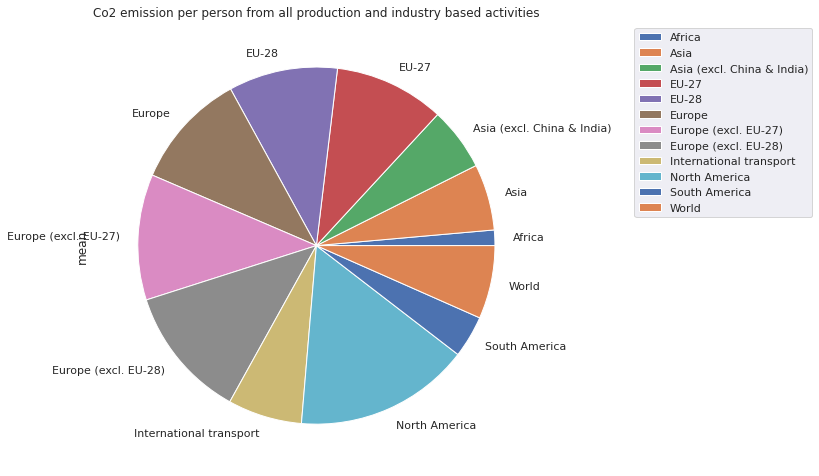

In [68]:
regions.groupby(['country'])['Total_co2_emission_per_capita'].agg(['mean']).plot(kind='pie',subplots=True)
plt.legend(bbox_to_anchor=(1.20,1),loc="upper left")
plt.title('Co2 emission per person from all production and industry based activities');

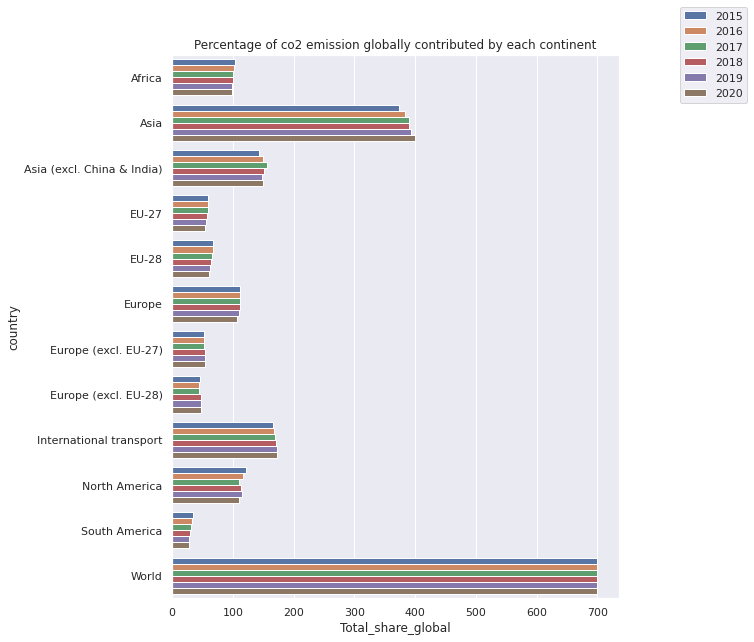

In [69]:
x = regions['country']
y=  regions['Total_share_global']
hue= regions['year']
a=sns.barplot(x=y, y=x, hue=hue, data=regions) 
plt.legend(bbox_to_anchor=(1.30,1),loc="right")
sns.set(rc = {'figure.figsize':(8,10)})
a.set_title('Percentage of co2 emission globally contributed by each continent');

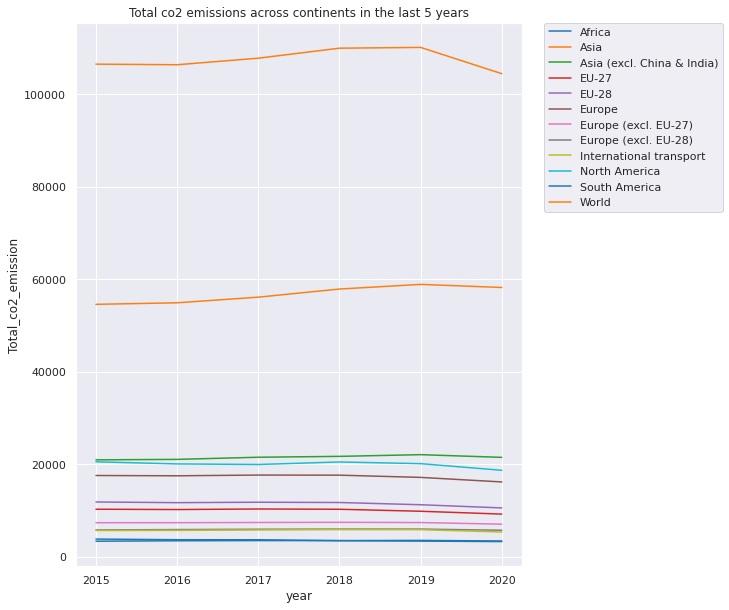

In [67]:
p =sns.lineplot(data=regions,x=regions['year'],y=regions['Total_co2_emission'],hue=regions['country'],palette='tab10')
#sns.lineplot(data=regions,x=regions['year'],y=regions_subset,hue=regions['country'])
#sns.lineplot(data=regions_subset2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
p.set_title('Total co2 emissions across continents in the last 5 years');